In [1]:
from emcee import EnsembleSampler
from emcee.backends import HDFBackend
import numpy as np
from read_files import *
from calc_wp import *
from collections import namedtuple
from multiprocessing import Pool, Process
import matplotlib.pyplot as plt

In [8]:
wp_table = read_wp('../wp_table')
rp, signal = read_signal('../signal.npy' )
cov = read_cov('../cov.npy')
cov_inv = np.linalg.inv(cov)
logM, Nh = read_halo_mass_function('../halo_mass_function.npy')

sep_min = 0.1
sep_max = 100
sep_N = 30

r_pbins = np.geomspace(sep_min, sep_max, sep_N+1)

rp0 = (r_pbins[1:]*r_pbins[:-1])**0.5
interpolate_table(wp_table, rp, rp0)

In [3]:
rp

array([ 3.37197138,  4.25999539,  5.38188457,  6.79922837,  8.58983612,
       10.85200857, 13.70993443, 17.32050808, 21.88194273, 27.64465197,
       34.92499691, 44.12265385])

In [3]:
from run_mcmc import HODParameter

In [4]:
para = HODParameter([1, 1, 1, 1, 1])

In [5]:
# origin_parameter = [12.31988684,  2.06030245, 11.32567553, 13.09619071,  2.50053181]
# origin_parameter = [11.4449611 ,  1.28328694, 10.34682917, 12.91540558,  1.8884619 ]
# origin_parameter = [13.24940846,  3.03525797, 12.25667172, 13.17663548,  2.57286721]
origin_parameter = [13.06353858,  1.92098929, 12.40119155, 13.15550482,  2.51502643]
full_para = para.full_parameters(origin_parameter)
predict = w_p(logM, Nh, full_para, wp_table)

In [6]:
n = len(rp)
auto = signal[:n]
cross = signal[n:]
auto_err = np.sqrt([cov[i,i] for i in range(n)])
cross_err = np.sqrt([cov[i,i] for i in range(n, n*2)])

[]

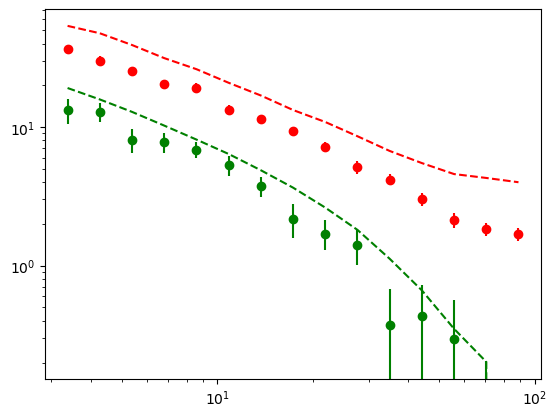

In [7]:
plt.errorbar(rp, auto, auto_err, fmt='ro')
plt.errorbar(rp, cross, cross_err, fmt='go')
plt.plot(rp, predict[:n], 'r--')
plt.plot(rp, predict[n:], 'g--')
plt.loglog()

In [47]:
auto_err

array([2.82442226, 2.19931366, 1.78186417, 1.42248137, 1.43637647,
       1.07948658, 0.75830582, 0.63901778, 0.57774281, 0.53616789,
       0.38667363, 0.33909352, 0.27968966, 0.19554675, 0.18372154])

In [48]:
cross_err

array([2.62292003, 1.99528713, 1.56610608, 1.23919519, 0.91208111,
       0.84609517, 0.62180587, 0.59303443, 0.41768814, 0.39346401,
       0.30297151, 0.29437056, 0.26744679, 0.20645843, 0.21551923])

In [11]:
wp_table = read_wp('./wp_table')

In [23]:
origin_parameter = np.loadtxt('para')

In [3]:
import matplotlib.pyplot as plt

[]

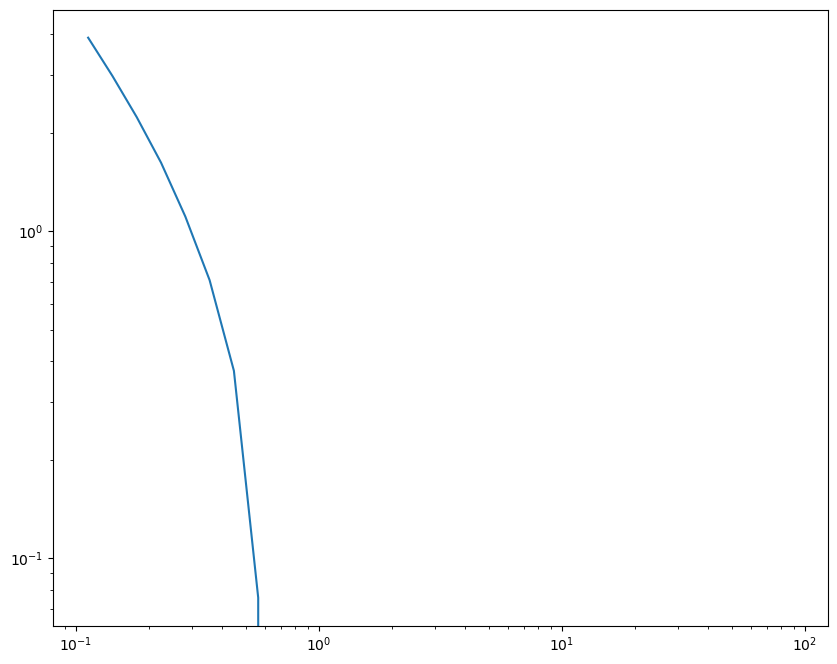

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(rp0, wp_table['1h_cs'][80])
ax.loglog()

In [2]:
import yaml

In [10]:
with open('conf1.yaml', 'r') as f:
    conf = list(yaml.load_all(f, yaml.FullLoader))

In [11]:
conf

[{'para1': {'free': True, 'initial': 10, 'range': [1, 20]},
  'para2': {'free': False, 'initial': 1.5}},
 {'Nwalker': 40}]